In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_theme(style="ticks", color_codes=True)
#import math
pd.set_option('display.max_rows', None)

In [6]:
def cohen_d(group1, group2):
     """ 
         Calculate Cohen's d for two groups.
         Group1/Group2: Pandas Series or Numpy array
         Return d: float64
     """
     diff = group1.mean() - group2.mean()
     n1, n2 = len(group1), len(group2)
     var1, var2 = group1.var(), group2.var()
     pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
     d = diff / np.sqrt(pooled_var) # sqrt of var is stdev
     return d # d is ultimately a ratio

In [7]:
#Load all data
ph_events_df = pd.read_csv('finalResults__events_Ph.csv')
vr_events_df = pd.read_csv('finalResults__events_VR.csv')
ph_events_part_invalid_df = pd.read_csv('finalResults_part_invalid__events_Ph.csv')
vr_events_part_invalid_df = pd.read_csv('finalResults_part_invalid__events_VR.csv')

#Merge ph_events_df with ph_events_part_invalid_df
ph_events_df = ph_events_df.append(ph_events_part_invalid_df)
vr_events_df = vr_events_df.append(vr_events_part_invalid_df)

vr_events_df.drop(['Unnamed: 0','Mistake_Number','Mistake_Time_Stamp','Baseline_GSR_Peaks_Rate'], axis=1, inplace=True)
ph_events_df.drop(['Unnamed: 0','Mistake_Number','Mistake_Time_Stamp','Baseline_GSR_Peaks_Rate'], axis=1, inplace=True)

vr_events_df['Participant_ID'] = vr_events_df['Participant_ID'].str.upper()
ph_events_df['Participant_ID'] = ph_events_df['Participant_ID'].str.upper()

#Normalize the data
def normalize_event_signals(df):
    df['Event_HR'] = df['Event_HR'] - df['Baseline_HR']
    df['Event_Mean_NNI'] = df['Event_Mean_NNI'] - df['Baseline_Mean_NNI']
    df['Event_RMSSD'] = df['Event_RMSSD'] - df['Baseline_RMSSD']
    df['Event_SDNN'] = df['Event_SDNN'] - df['Baseline_SDNN']
    df['Event_LFHF_Ratio'] = df['Event_LFHF_Ratio'] - df['Baseline_LFHF_Ratio']
    df['Event_HFN'] = df['Event_HFN'] - df['Baseline_HFN']
    df['Event_GSR'] = df['Event_GSR'] - df['Baseline_GSR']
 
def aggregate_events_by_level_pid(df):
    #Create copy of df
    df_agg = df.copy()
    #Group by participant ID and event type and find the mean of each column
    df_agg = df_agg.groupby(['Participant_ID', 'Level']).mean()
    #Reset the index
    df_agg = df_agg.reset_index()
    return df_agg

def aggregate_events_by_pid(df):
    #Create copy of df
    df_agg = df.copy()
    #Group by participant ID and event type and find the mean of each column
    df_agg = df_agg.groupby(['Participant_ID']).mean()
    #Reset the index
    df_agg = df_agg.reset_index()
    return df_agg    


def aggregate_events_by_level(df):
    #Create copy of df
    df_agg = df.copy()
    #Group by participant ID and event type and find the mean of each column
    df_agg = df_agg.groupby(['Level']).mean()
    #Reset the index
    df_agg = df_agg.reset_index()
    return df_agg       

def remove_test_events(df):
    #Remove rows where Level is not 'Pretest' or 'Posttest'
    df = df[~df['Level'].isin(['Pretest','Posttest'])]
    return df


normalize_event_signals(vr_events_df)
normalize_event_signals(ph_events_df)

In [8]:
#vr_events_df.columns

In [9]:
vr_events_level_pid_agg_df = aggregate_events_by_level_pid(vr_events_df)
ph_events_level_pid_agg_df = aggregate_events_by_level_pid(ph_events_df)
vr_events_level_pid_agg_df = remove_test_events(vr_events_level_pid_agg_df)
ph_events_level_pid_agg_df = remove_test_events(ph_events_level_pid_agg_df)

In [10]:
vr_events_pid_agg_df = aggregate_events_by_pid(vr_events_level_pid_agg_df)
ph_events_pid_agg_df = aggregate_events_by_pid(ph_events_level_pid_agg_df)

In [11]:
def check_normality_all_features(df):
    for column in df.columns:
        #print(column,' ', df[column].notna().value_counts())
        if column != 'Participant_ID':        
            if stats.shapiro(df[df[column].notna()][column]).pvalue > 0.05:
                #print(column,' is not normally distributed')
            #else:
                print('** ',column,' is normally distributed')
print("VR")
print('----')
check_normality_all_features(vr_events_pid_agg_df)
print("Physical")
print('--------')
check_normality_all_features(ph_events_pid_agg_df)

#for column in ['Baseline_GSR', 'Norm_Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR', 'Baseline_HR', 'Norm_Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR', 'Pretest_Time', 'Pretest_Mistake_Time', 'Posttest_Time', 'Posttest_Mistake_Time']:
#    print(column, " - shapiro test p-value less than 0.05 - ", stats.shapiro(ph_results_df[ph_results_df[column].notna()][column]).pvalue < 0.05) #Not normal if p-value is less than 0.05


VR
----
**  Baseline_HR  is normally distributed
**  Baseline_LFN  is normally distributed
**  Baseline_HFN  is normally distributed
**  Event_HR  is normally distributed
**  Event_Mean_NNI  is normally distributed
**  Event_LFN  is normally distributed
**  Event_HFN  is normally distributed
Physical
--------
**  Baseline_HR  is normally distributed
**  Baseline_Mean_NNI  is normally distributed
**  Event_HR  is normally distributed
**  Event_HFN  is normally distributed


In [12]:
vr_events_pid_agg_df.head()

,Participant_ID,Baseline_HR,Baseline_GSR,Baseline_GSR_Mean_Peak_Amplitude,Baseline_RMSSD,Baseline_SDNN,Baseline_Mean_NNI,Baseline_LFN,Baseline_HFN,Baseline_LFHF_Ratio,Event_GSR,Event_HR,Event_RMSSD,Event_SDNN,Event_Mean_NNI,Event_LFN,Event_HFN,Event_LFHF_Ratio,Event_GSR_Peaks_Count,Event_GSR_Peak_Amplitude
0,2D0101,72.635945,0.673174,0.006376,41.163461,60.409942,851.820276,61.502726,38.497274,1.597586,0.088732,-0.154840,-7.959041,-22.062221,-3.311506,55.604032,5.898694,-0.064436,1.476493,0.041043
1,2D0102,69.837321,1.111569,0.002004,52.490979,68.845292,891.133971,38.963561,61.036439,0.638366,NaN,-0.501944,1.973167,-12.919392,28.704249,31.983016,6.980544,0.045690,NaN,NaN
2,2D0103,71.197183,2.300476,0.207598,29.809220,40.852693,866.417840,74.061357,25.938643,2.855252,1.521024,0.014089,6.723321,-4.443621,17.008440,50.560961,23.500396,-1.385800,1.492690,0.273519
3,2D0104,55.605405,0.734863,0.000423,545.066001,384.880686,1003.351351,20.055307,79.944693,0.250865,NaN,2.806947,-178.099039,-146.351603,16.177366,18.582819,1.472488,0.010630,NaN,NaN
4,2D0201,61.621762,1.450281,0.003328,245.595376,200.033217,956.813472,25.523414,74.476586,0.342704,2.318371,5.117958,-153.013693,-111.894655,-34.687522,30.328839,-4.805426,0.319524,5.825426,0.000808


In [13]:
#Comparison of event signals
#GSR
print("\nMean of Mean Event GSR in VR vs Physical")
print(round(vr_events_pid_agg_df['Event_GSR'].mean(),2), round(ph_events_pid_agg_df['Event_GSR'].mean(),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_events_pid_agg_df['Event_GSR'].dropna(), y=ph_events_pid_agg_df['Event_GSR'].dropna(), alternative = 'less')) 

#HR
print("\nMean of Mean Event HR in VR vs Physical")
print(round(vr_events_pid_agg_df['Event_HR'].mean(),2), round(ph_events_pid_agg_df['Event_HR'].mean(),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_events_pid_agg_df['Event_HR'].dropna(), y=ph_events_pid_agg_df['Event_HR'].dropna(), alternative = 'less'))

#Mean NNI
print("\nMean of Mean Event NNI in VR vs Physical")
print(round(vr_events_pid_agg_df['Event_Mean_NNI'].mean(),2), round(ph_events_pid_agg_df['Event_Mean_NNI'].mean(),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_events_pid_agg_df['Event_Mean_NNI'].dropna(), y=ph_events_pid_agg_df['Event_Mean_NNI'].dropna(), alternative = 'greater'))

#RMSSD
print("\nMean of Mean Event RMSSD in VR vs Physical")
print(round(vr_events_pid_agg_df['Event_RMSSD'].mean(),2), round(ph_events_pid_agg_df['Event_RMSSD'].mean(),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_events_pid_agg_df['Event_RMSSD'].dropna(), y=ph_events_pid_agg_df['Event_RMSSD'].dropna(), alternative = 'greater'))

#SDNN
print("\nMean of Mean Event SDNN in VR vs Physical")
print(round(vr_events_pid_agg_df['Event_SDNN'].mean(),2), round(ph_events_pid_agg_df['Event_SDNN'].mean(),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_events_pid_agg_df['Event_SDNN'].dropna(), y=ph_events_pid_agg_df['Event_SDNN'].dropna(), alternative = 'greater'))

#Event LF/HF Ratio
print("\nMean of Mean Event LF/HF Ratio in VR vs Physical")
print(round(vr_events_pid_agg_df['Event_LFHF_Ratio'].mean(),2), round(ph_events_pid_agg_df['Event_LFHF_Ratio'].mean(),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_events_pid_agg_df['Event_LFHF_Ratio'].dropna(), y=ph_events_pid_agg_df['Event_LFHF_Ratio'].dropna(), alternative = 'less'))

#HFN
print("\nMean of Mean Event HFN in VR vs Physical")
print(round(vr_events_pid_agg_df['Event_HFN'].mean(),2), round(ph_events_pid_agg_df['Event_HFN'].mean(),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_events_pid_agg_df['Event_HFN'].dropna(), y=ph_events_pid_agg_df['Event_HFN'].dropna(), alternative = 'greater'))

#LFN
print("\nMean of Mean Event LFN in VR vs Physical")
print(round(vr_events_pid_agg_df['Event_LFN'].mean(),2), round(ph_events_pid_agg_df['Event_LFN'].mean(),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_events_pid_agg_df['Event_LFN'].dropna(), y=ph_events_pid_agg_df['Event_LFN'].dropna(), alternative = 'less'))

#Event_GSR_Peak_Amplitude
print("\nMean of Mean Event GSR Peak Amplitude in VR vs Physical")
print(round(vr_events_pid_agg_df['Event_GSR_Peak_Amplitude'].mean(),2), round(ph_events_pid_agg_df['Event_GSR_Peak_Amplitude'].mean(),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_events_pid_agg_df['Event_GSR_Peak_Amplitude'].dropna(), y=ph_events_pid_agg_df['Event_GSR_Peak_Amplitude'].dropna(), alternative = 'less'))



Mean of Mean Event GSR in VR vs Physical
2.28 2.68
Statistical significance -  MannwhitneyuResult(statistic=552.0, pvalue=0.11085696670673856)

Mean of Mean Event HR in VR vs Physical
-1.45 0.58
Statistical significance -  MannwhitneyuResult(statistic=617.0, pvalue=0.05553035587459007)

Mean of Mean Event NNI in VR vs Physical
16.36 4.14
Statistical significance -  MannwhitneyuResult(statistic=838.0, pvalue=0.2864335931288994)

Mean of Mean Event RMSSD in VR vs Physical
-31.64 -32.89
Statistical significance -  MannwhitneyuResult(statistic=882.0, pvalue=0.15979776929744655)

Mean of Mean Event SDNN in VR vs Physical
-27.22 -28.25
Statistical significance -  MannwhitneyuResult(statistic=821.0, pvalue=0.3456338916718915)

Mean of Mean Event LF/HF Ratio in VR vs Physical
-1.19 -0.85
Statistical significance -  MannwhitneyuResult(statistic=719.0, pvalue=0.27650648972457303)

Mean of Mean Event HFN in VR vs Physical
9.94 5.59
Statistical significance -  MannwhitneyuResult(statistic=861.0, 

c:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


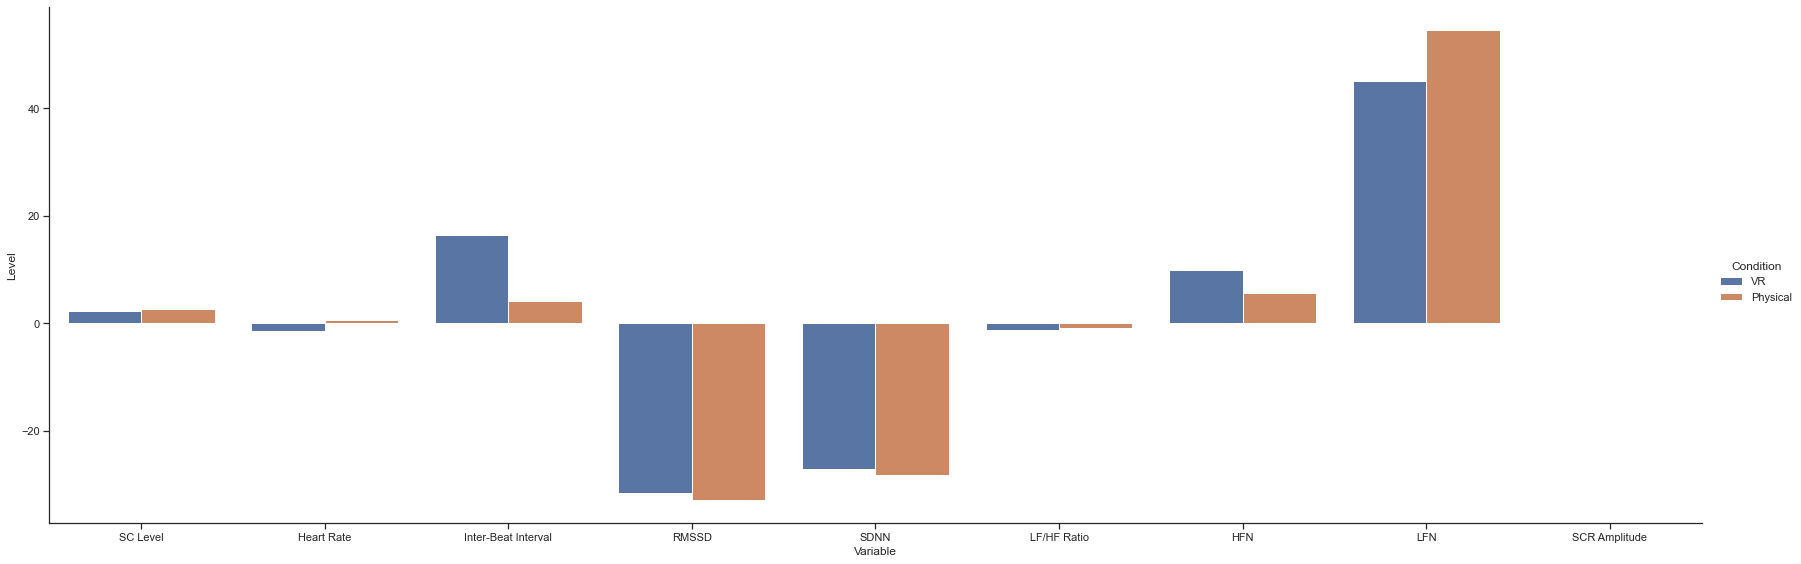

In [45]:
vr_events_pid_agg_df['Condition'] = 'VR'
ph_events_pid_agg_df['Condition'] = 'Physical'
combined_events_pid_agg_df = vr_events_pid_agg_df.append(ph_events_pid_agg_df)
combined_events_pid_agg_df.rename(columns={'Event_GSR': 'SC Level', 'Event_HR' : 'Heart Rate', 'Event_Mean_NNI' : 'Inter-Beat Interval', 'Event_RMSSD' : 'RMSSD', 'Event_SDNN' : 'SDNN', 'Event_LFHF_Ratio' : 'LF/HF Ratio', 'Event_HFN' : 'HFN', 'Event_LFN' : 'LFN','Event_GSR_Peak_Amplitude' : 'SCR Amplitude'}, inplace=True)
combined_events_pid_agg_df = combined_events_pid_agg_df[['SC Level', 'Heart Rate', 'Inter-Beat Interval', 'RMSSD', 'SDNN', 'LF/HF Ratio', 'HFN', 'LFN', 'SCR Amplitude', 'Condition']].copy()
#combined_events_pid_agg_df.head()
combined_events_pid_agg_df_long = combined_events_pid_agg_df.melt(id_vars=['Condition'], var_name='Variable', value_name='Level')
ax = sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long, ci = None, size=8, aspect=3, capsize=.04)

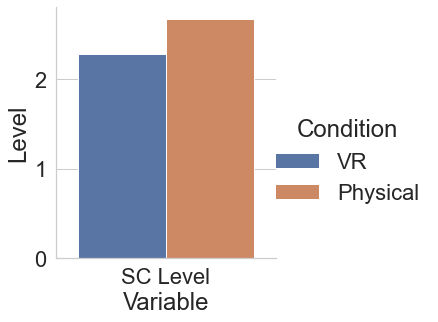

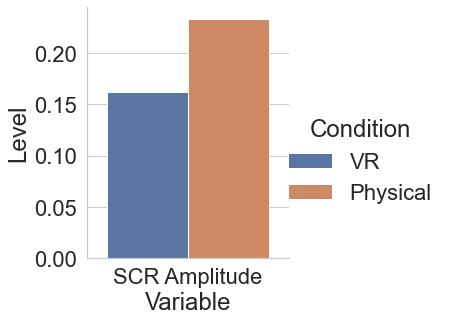

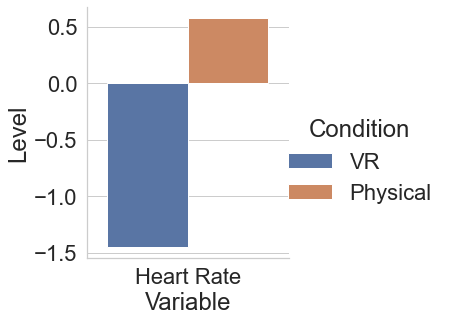

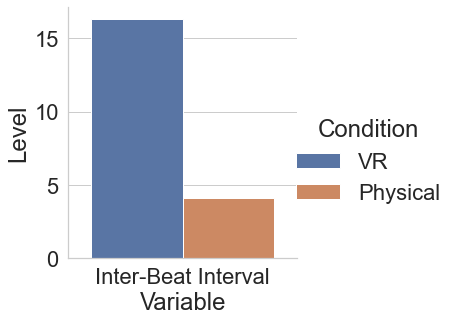

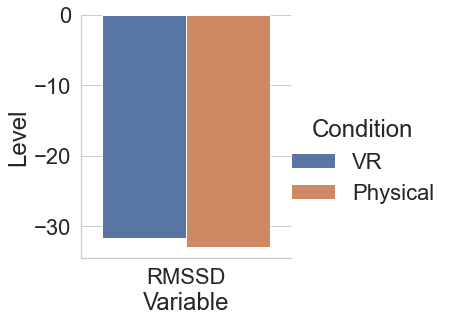

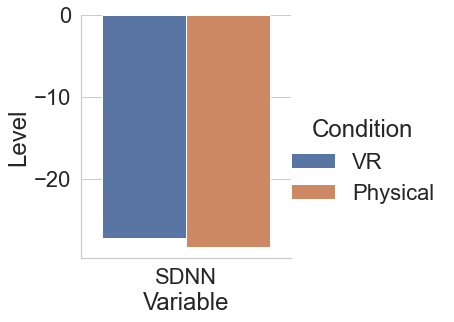

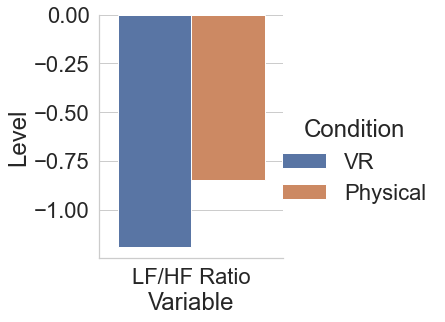

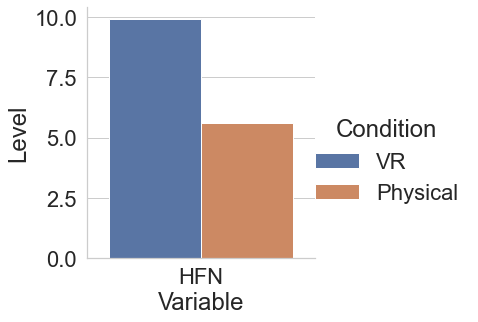

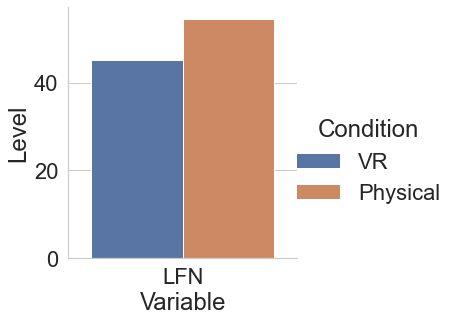

In [48]:
sns.set(rc={'figure.figsize':(80,8)}, font_scale=2, style='whitegrid')
sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long[combined_events_pid_agg_df_long['Variable'] == 'SC Level'], ci = None, capsize=.04)
sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long[combined_events_pid_agg_df_long['Variable'] == 'SCR Amplitude'], ci = None)
sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long[combined_events_pid_agg_df_long['Variable'] == 'Heart Rate'], ci = None)
sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long[combined_events_pid_agg_df_long['Variable'] == 'Inter-Beat Interval'], ci = None)
sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long[combined_events_pid_agg_df_long['Variable'] == 'RMSSD'], ci = None)
sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long[combined_events_pid_agg_df_long['Variable'] == 'SDNN'], ci = None)
sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long[combined_events_pid_agg_df_long['Variable'] == 'LF/HF Ratio'], ci = None)
sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long[combined_events_pid_agg_df_long['Variable'] == 'HFN'], ci = None)
sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=combined_events_pid_agg_df_long[combined_events_pid_agg_df_long['Variable'] == 'LFN'], ci = None)



In [36]:
#combined_events_pid_agg_df.columns

In [37]:
vr_events_level_agg_df = aggregate_events_by_level(vr_events_level_pid_agg_df)
ph_events_level_agg_df = aggregate_events_by_level(ph_events_level_pid_agg_df)

In [38]:
vr_events_level_agg_df.head()

,Level,Baseline_HR,Baseline_GSR,Baseline_GSR_Mean_Peak_Amplitude,Baseline_RMSSD,Baseline_SDNN,Baseline_Mean_NNI,Baseline_LFN,Baseline_HFN,Baseline_LFHF_Ratio,Event_GSR,Event_HR,Event_RMSSD,Event_SDNN,Event_Mean_NNI,Event_LFN,Event_HFN,Event_LFHF_Ratio,Event_GSR_Peaks_Count,Event_GSR_Peak_Amplitude
0,Level 1,73.586034,1.298589,0.045809,199.359230,156.992212,851.718334,53.733899,46.266101,2.805369,2.278010,1.359596,-87.692202,-65.679507,-3.496609,49.024269,4.709630,-0.914896,2.044075,0.162399
1,Level 2,74.452889,1.403901,0.052739,178.016994,142.774449,841.472797,54.410609,45.589391,2.764102,2.238101,-2.382927,-27.242264,-23.119645,25.982407,42.566434,11.844175,-1.261667,1.933904,0.206845
2,Level 3,74.425412,1.355882,0.047294,178.487788,143.861312,842.043776,54.668534,45.331466,2.826721,2.411737,-2.350208,-51.185943,-44.503911,21.713422,41.502488,13.166045,-1.529075,1.925460,0.126397
3,Level 4,74.344707,1.379497,0.051405,174.770824,141.286096,842.653127,55.153354,44.846646,2.827435,2.489610,-1.085494,19.030264,11.674269,7.998545,48.139513,7.013841,-0.988312,2.216174,0.169395


In [39]:
ph_events_level_agg_df.head()

,Level,Baseline_HR,Baseline_GSR,Baseline_GSR_Mean_Peak_Amplitude,Baseline_RMSSD,Baseline_SDNN,Baseline_Mean_NNI,Baseline_LFN,Baseline_HFN,Baseline_LFHF_Ratio,Event_GSR,Event_HR,Event_RMSSD,Event_SDNN,Event_Mean_NNI,Event_LFN,Event_HFN,Event_LFHF_Ratio,Event_GSR_Peaks_Count,Event_GSR_Peak_Amplitude
0,Level 1,73.462639,1.564296,0.028311,169.789087,136.682069,842.014004,57.551075,42.448925,3.187028,2.261017,0.221421,-49.485944,-43.679149,0.625109,50.696265,6.854810,-0.931960,1.663857,0.265421
1,Level 2,75.345434,1.565810,0.041419,134.124566,115.708593,824.254229,59.688635,40.311365,3.450398,2.251782,-1.297590,-50.960900,-47.101602,29.322175,51.102543,8.586092,-1.732139,2.038634,0.145066
2,Level 3,75.354965,1.576717,0.038100,132.475145,114.520025,824.811299,59.684933,40.315067,3.315948,2.485303,0.474962,-20.180773,-19.973221,-4.863543,53.893385,5.791548,-0.477416,2.235901,0.150717
3,Level 4,75.386553,1.628211,0.048384,129.067160,112.000476,824.304229,60.174802,39.825198,3.267154,2.910898,2.013898,-23.504421,-14.516832,-5.651201,56.834274,3.340528,-0.877751,2.183738,0.218284
